### Data  Exploration

In [2]:
from __future__ import print_function, division
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
t0 = time.time()
df_train = pd.read_csv('./data/train.csv')
print("%.2f secs ==> pd.read_csv"%(time.time()-t0))
print (df_train.shape)
df_train.head(5)

15.48 secs ==> pd.read_csv
(2430981, 25)


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [4]:
# read validation set
t0 = time.time()
df_val= pd.read_csv('./data/validation.csv')
print("%.2f secs ==> pd.read_csv"%(time.time()-t0))

df_val.head(5)
print(df_val.shape)

2.06 secs ==> pd.read_csv
(303925, 25)


### 1.Data pre-processing

In [5]:
df_train=df_train[df_train.payprice>=df_train.slotprice]
df_val=df_val[df_val.payprice>=df_val.slotprice]
print(df_train.shape)
print(df_val.shape)

(2418578, 25)
(302408, 25)


### 2. Data distribution

Text(0,0.5,'Frequency')

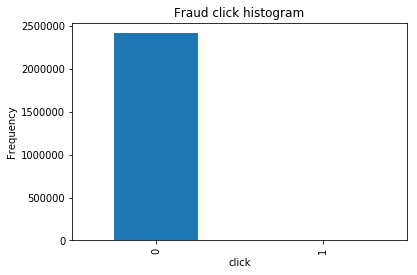

In [6]:
count_classes = pd.value_counts(df_train['click'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud click histogram")
plt.xlabel("click")
plt.ylabel("Frequency")

### 3. Basic Statistics

In [7]:
#the rate of win
df_win=df_train.where(df_train['bidprice']>=df_train['payprice'])
win=df_win['bidid'].count()
num_train=df_train['bidid'].count()
win_rate=win/num_train
print (win_rate)

1.0


In [8]:
#the number of Imps
#because the rate of win is 1.0, all the data in this set have chance to imp
Imps=df_win['bidid'].groupby(df_win['advertiser']).count()

#print(Imps)
Imps.shape

(9,)

In [9]:
adver_1=df_train['advertiser'].groupby(df_train['advertiser'])
#print(adver_1)

#print(adver_1.size())


In [10]:
#the num of click
click=df_train['click'].groupby(df_train['advertiser']).sum()
#print(click)
click.shape

(9,)

In [11]:
#cost
cost_1000=df_win['payprice'].groupby(df_win['advertiser']).sum()
cost=cost_1000/1000
#print (cost)
cost.shape

(9,)

In [12]:
win_rate=np.array([1,1,1,1,1,1,1,1,1])
win_rate.shape

(9,)

In [13]:
#CTR
CTR=click/Imps
#print(CTR)
CTR.shape

(9,)

In [14]:
#CPM
CPM=(cost/Imps)*1000
#print(CPM)

In [15]:
#eCPC
eCPC=cost/click
#print(eCPC)

In [16]:
# make new table
table=pd.DataFrame({"Imps":Imps,"Clicks":click,"cost":cost,"Win Ratio":win_rate,"CTR(%)": CTR*100,"CPM":CPM,"eCPC":eCPC})
table

,CPM,CTR(%),Clicks,Imps,Win Ratio,cost,eCPC
advertiser,,,,,,,
1458,69.269705,0.078703,384,487908,1,33797.243,88.013654
2259,93.221503,0.032368,43,132847,1,12384.197,288.004581
2261,89.663479,0.032754,36,109910,1,9854.913,273.747583
2821,89.134146,0.062059,131,211091,1,18815.416,143.629130
2997,62.709896,0.436922,214,48979,1,3071.468,14.352654
3358,84.720599,0.076239,202,264956,1,22447.231,111.124906
3386,77.309091,0.070559,317,449269,1,34732.578,109.566492
3427,75.616517,0.067526,272,402805,1,30458.711,111.980555
3476,76.955530,0.060165,187,310813,1,23918.779,127.907909


In [17]:
# read validation set
t0 = time.time()
df_val = pd.read_csv('./data/validation.csv')
print("%.2f secs ==> pd.read_csv"%(time.time()-t0))
df_val.head(5)

2.33 secs ==> pd.read_csv


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [18]:
#the rate of win in the validation set
val_win=df_val.where(df_val['bidprice']>=df_val['payprice'])
win_val=val_win['bidid'].count()
num_val=df_val['bidid'].count()
val_win_rate=win_val/num_val
print (val_win_rate)


win_rate_val=np.ones(9)
win_rate_val.shape

1.0


(9,)

In [19]:
#the number of Imps in the val data set
#because the rate of win is 1.0, all the data in this set have chance to imp
Imps_val=val_win['bidid'].groupby(val_win['advertiser']).count()

#print(Imps_val)
Imps_val.shape

(9,)

In [20]:
#the num of click in the val data set
click_val=df_val['click'].groupby(df_val['advertiser']).sum()
#print(click_val)
click_val.shape

(9,)

In [21]:
#cost
cost_1000_val=val_win['payprice'].groupby(val_win['advertiser']).sum()
cost_val=cost_1000_val/1000
#print (cost_val)
cost_val.shape

(9,)

In [22]:
#CTR
CTR_val=click_val/Imps_val
#print(CTR_val)
CTR_val.shape

(9,)

In [23]:
#CPM
CPM_val=(cost_val/Imps_val)*1000
#print(CPM_val)

In [24]:
#eCPC
eCPC_val=cost_val/click_val
#print(eCPC_val)

In [25]:
# make new table of val data set
table=pd.DataFrame({"Imps":Imps_val,"Clicks":click_val,"cost":cost_val,"Win Ratio":win_rate_val,"CTR(%)": CTR_val*100,"CPM":CPM_val,"eCPC":eCPC_val})
table

,CPM,CTR(%),Clicks,Imps,Win Ratio,cost,eCPC
advertiser,,,,,,,
1458,68.875627,0.078585,49,62353,1.0,4294.602,87.644939
2259,93.856297,0.011965,2,16715,1.0,1568.808,784.404000
2261,89.658745,0.022140,3,13550,1.0,1214.876,404.958667
2821,90.363355,0.086783,23,26503,1.0,2394.900,104.126087
2997,62.950777,0.420984,26,6176,1.0,388.784,14.953231
3358,84.824099,0.069826,23,32939,1.0,2794.021,121.479174
3386,76.780958,0.049413,28,56665,1.0,4350.793,155.385464
3427,75.259251,0.073730,37,50183,1.0,3776.735,102.073919
3476,77.077083,0.028321,11,38841,1.0,2993.751,272.159182


### 3.1 Comparing Advertiser 2997 and Advertiser 1458

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


In [27]:
def makefigure(v_1, v_2):
    a=v_1.size
    b=v_2.size
    CTR_NEW=np.hstack((v_1,v_2))
    n_1=v_1.keys()
    n_2=v_2.keys()
    
    key=np.hstack((n_1,n_2))
    c=np.ones(a)
    d=np.ones(b)
    c_1=1458*c
    d_1=2997*d
    
    advertiser=np.hstack((c_1,d_1))
    return CTR_NEW, key,advertiser

### 3.2.1 CTR

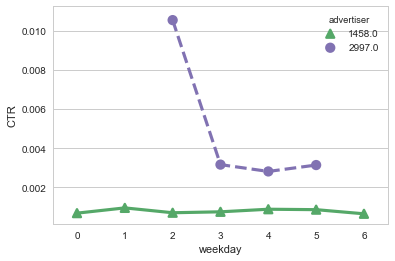

In [28]:
#CTR_week
df_1458=df_train[df_train['advertiser']==1458]
df_2997=df_train[df_train['advertiser']==2997]

CTR_1458=df_1458['click'].groupby(df_1458['weekday']).mean()
CTR_2997=df_2997['click'].groupby(df_2997['weekday']).mean()

CTR, weekday,advertiser = makefigure(CTR_1458,CTR_2997)
table_1=pd.DataFrame({"advertiser":advertiser,"weekday":weekday,"CTR":CTR})
sns.pointplot(x="weekday", y="CTR", hue="advertiser", data=table_1,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

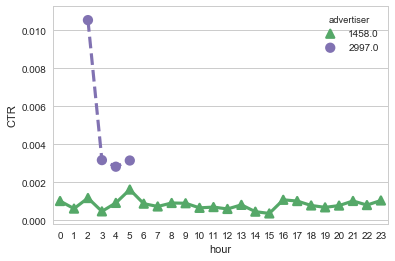

In [29]:
#CTR-HOUR
CTR_1458=df_1458['click'].groupby(df_1458['hour']).mean()
CTR_3358=df_2997['click'].groupby(df_2997['hour']).mean()

CTR, hour,advertiser = makefigure(CTR_1458,CTR_2997)
table_2=pd.DataFrame({"advertiser":advertiser, "hour":hour,"CTR":CTR})

#plt.figure(figsize=(10, 8))
sns.pointplot(x="hour", y="CTR", hue="advertiser", data=table_2,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag', 'OS', 'browser']


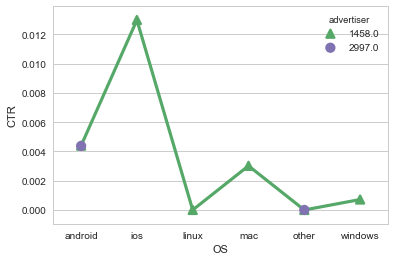

In [30]:
#CTR-OS
df_train['OS'], df_train['browser'] = zip(*df_train['useragent'].map(lambda x: x.split('_')))
col_names=df_train.columns.tolist()
print(col_names)

df_1458=df_train[df_train['advertiser']==1458]
df_2997=df_train[df_train['advertiser']==2997]

CTR_1458=df_1458['click'].groupby(df_1458['OS']).mean()
CTR_2997=df_2997['click'].groupby(df_2997['OS']).mean()
CTR, OS,advertiser = makefigure(CTR_1458,CTR_2997)
table_16=pd.DataFrame({"advertiser":advertiser,"OS":OS,"CTR":CTR})

sns.pointplot(x="OS", y="CTR", hue="advertiser", data=table_16,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

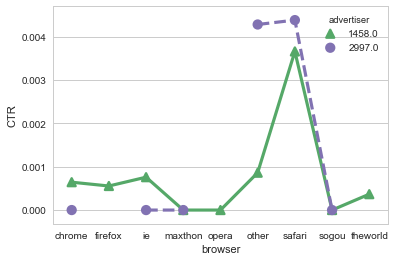

In [31]:
#CTR-browser
CTR_1458=df_1458['click'].groupby(df_1458['browser']).mean()
CTR_2997=df_2997['click'].groupby(df_2997['browser']).mean()
CTR, browser,advertiser = makefigure(CTR_1458,CTR_2997)
table_17=pd.DataFrame({"advertiser":advertiser,"browser":browser,"CTR":CTR})

sns.pointplot(x="browser", y="CTR", hue="advertiser", data=table_17,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

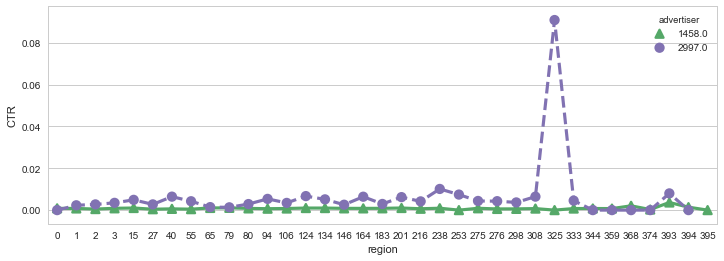

In [32]:
#CTR-region
CTR_1458=df_1458['click'].groupby(df_1458['region']).mean()
CTR_2997=df_2997['click'].groupby(df_2997['region']).mean()
CTR, region,advertiser = makefigure(CTR_1458,CTR_2997)
table_3=pd.DataFrame({"advertiser":advertiser,"region":region,"CTR":CTR})


plt.figure(figsize=(12, 4))
sns.pointplot(x="region", y="CTR", hue="advertiser", data=table_3,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

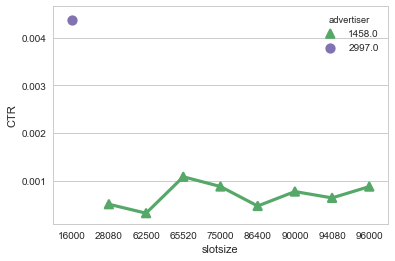

In [33]:
#CTR-slotsize
slotsize=df_train['slotwidth']*df_train['slotheight']
df_train['slotsize']=slotsize
col_names=df_train.columns.tolist()
#print(col_names)

df_1458=df_train[df_train['advertiser']==1458]
df_2997=df_train[df_train['advertiser']==2997]
CTR_1458=df_1458['click'].groupby(df_1458['slotsize']).mean()
CTR_2997=df_2997['click'].groupby(df_2997['slotsize']).mean()

CTR, slotsize_1,advertiser = makefigure(CTR_1458,CTR_2997)
table_4=pd.DataFrame({"advertiser":advertiser,"slotsize":slotsize_1,"CTR":CTR})

#plt.figure(figsize=(12, 6))
sns.pointplot(x="slotsize", y="CTR", hue="advertiser", data=table_4,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

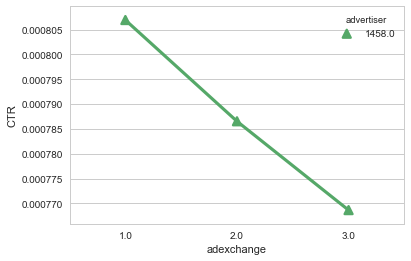

In [34]:
#CTR-adexchange
col_names=df_train.columns.tolist()
#print(col_names)
CTR_1458=df_1458['click'].groupby(df_1458['adexchange']).mean()
CTR_2997=df_2997['click'].groupby(df_2997['adexchange']).mean()

CTR, ad,advertiser = makefigure(CTR_1458,CTR_2997)
table_5=pd.DataFrame({"advertiser":advertiser,"adexchange":ad,"CTR":CTR})

sns.pointplot(x="adexchange", y="CTR", hue="advertiser", data=table_5,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### 3.2.2 Price

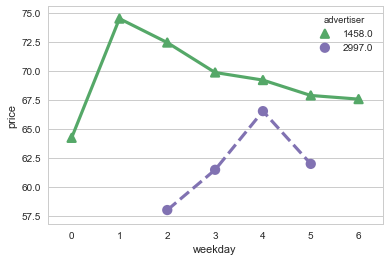

In [37]:
#price-weekday
pay_1458=df_1458['payprice'].groupby(df_1458['weekday']).mean()
pay_2997=df_2997['payprice'].groupby(df_2997['weekday']).mean()

price, ad,advertiser = makefigure(pay_1458,pay_2997)
table_11=pd.DataFrame({"advertiser":advertiser,"weekday":ad,"price":price})

sns.pointplot(x="weekday", y="price", hue="advertiser", data=table_11,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

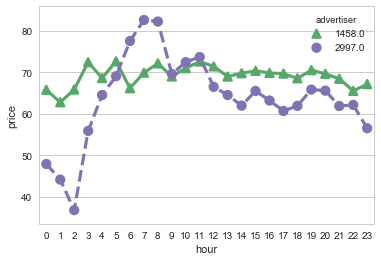

In [38]:
#price-hour
pay_1458=df_1458['payprice'].groupby(df_1458['hour']).mean()
pay_2997=df_2997['payprice'].groupby(df_2997['hour']).mean()

price, ad,advertiser = makefigure(pay_1458,pay_2997)
table_12=pd.DataFrame({"advertiser":advertiser,"hour":ad,"price":price})

sns.pointplot(x="hour", y="price", hue="advertiser", data=table_12,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

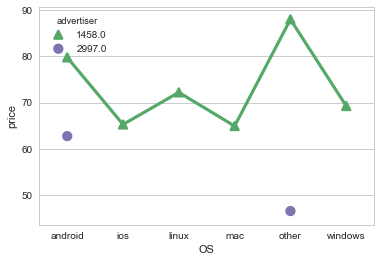

In [39]:
#price-OS
pay_1458=df_1458['payprice'].groupby(df_1458['OS']).mean()
pay_2997=df_2997['payprice'].groupby(df_2997['OS']).mean()

price, ad,advertiser = makefigure(pay_1458,pay_2997)
table_18=pd.DataFrame({"advertiser":advertiser,"OS":ad,"price":price})

sns.pointplot(x="OS", y="price", hue="advertiser", data=table_18,
              palette={1458: "g",2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

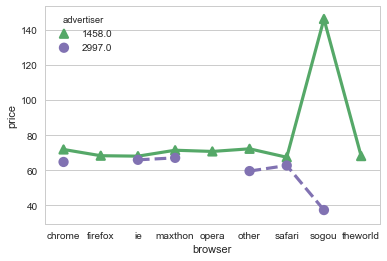

In [40]:
#price-browser
pay_1458=df_1458['payprice'].groupby(df_1458['browser']).mean()
pay_2997=df_2997['payprice'].groupby(df_2997['browser']).mean()

price, ad,advertiser = makefigure(pay_1458,pay_2997)
table_19=pd.DataFrame({"advertiser":advertiser,"browser":ad,"price":price})

sns.pointplot(x="browser", y="price", hue="advertiser", data=table_19,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

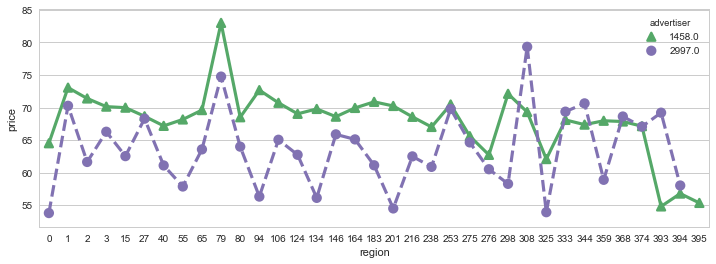

In [41]:
#price-hour
pay_1458=df_1458['payprice'].groupby(df_1458['region']).mean()
pay_2997=df_2997['payprice'].groupby(df_2997['region']).mean()

price, ad,advertiser = makefigure(pay_1458,pay_2997)
table_13=pd.DataFrame({"advertiser":advertiser,"region":ad,"price":price})
plt.figure(figsize=(12, 4))
sns.pointplot(x="region", y="price", hue="advertiser", data=table_13,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

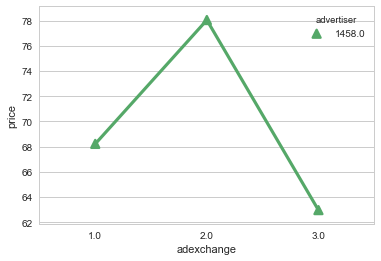

In [42]:
#price-adexchange
pay_1458=df_1458['payprice'].groupby(df_1458['adexchange']).mean()
pay_2997=df_2997['payprice'].groupby(df_2997['adexchange']).mean()
price, ad,advertiser = makefigure(pay_1458,pay_2997)
table_15=pd.DataFrame({"advertiser":advertiser,"adexchange":ad,"price":price})
sns.pointplot(x="adexchange", y="price", hue="advertiser", data=table_15,
              palette={1458: "g", 2997: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### 3.2.3 eCPC

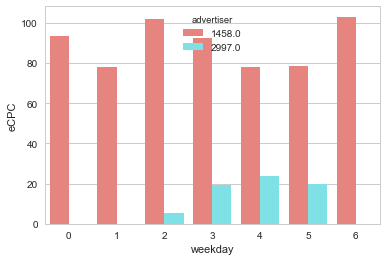

In [65]:
#eCPC-weekday
df_1458=df_train[df_train['advertiser']==1458]
df_2997=df_train[df_train['advertiser']==2997]

click_1458=df_1458['click'].groupby(df_1458['weekday']).sum()
click_2997=df_2997['click'].groupby(df_2997['weekday']).sum()
pay_1458=df_1458['payprice'].groupby(df_1458['weekday']).sum()/1000
pay_2997=df_2997['payprice'].groupby(df_2997['weekday']).sum()/1000

eCPC_1458=pay_1458/click_1458
eCPC_2997=pay_2997/click_2997

eCPC, weekday,advertiser = makefigure(eCPC_1458,eCPC_2997)
table_6=pd.DataFrame({"advertiser":advertiser,"weekday":weekday,"eCPC":eCPC})
sns.barplot(x="weekday", y="eCPC", hue="advertiser", data=table_6,palette=sns.hls_palette(2, l=.7, s=.9));

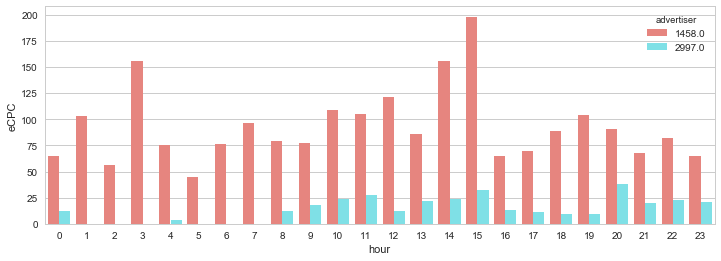

In [66]:
#eCPC-hour
click_1458=df_1458['click'].groupby(df_1458['hour']).sum()
click_2997=df_2997['click'].groupby(df_2997['hour']).sum()
pay_1458=df_1458['payprice'].groupby(df_1458['hour']).sum()/1000
pay_2997=df_2997['payprice'].groupby(df_2997['hour']).sum()/1000

eCPC_1458=pay_1458/click_1458
eCPC_2997=pay_2997/click_2997

eCPC, hour,advertiser = makefigure(eCPC_1458,eCPC_2997)
table_7=pd.DataFrame({"advertiser":advertiser,"hour":hour,"eCPC":eCPC})
plt.figure(figsize=(12, 4))
sns.barplot(x="hour", y="eCPC", hue="advertiser", data=table_7,palette=sns.hls_palette(2, l=.7, s=.9));

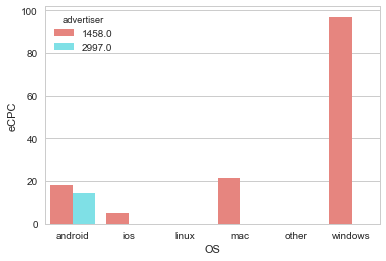

In [67]:
#eCPC-OS
click_1458=df_1458['click'].groupby(df_1458['OS']).sum()
click_2997=df_2997['click'].groupby(df_2997['OS']).sum()
pay_1458=df_1458['payprice'].groupby(df_1458['OS']).sum()/1000
pay_2997=df_2997['payprice'].groupby(df_2997['OS']).sum()/1000

eCPC_1458=pay_1458/click_1458
eCPC_2997=pay_2997/click_2997

eCPC, OS,advertiser = makefigure(eCPC_1458,eCPC_2997)
table_20=pd.DataFrame({"advertiser":advertiser,"OS":OS,"eCPC":eCPC})

sns.barplot(x="OS", y="eCPC", hue="advertiser", data=table_20,palette=sns.hls_palette(2, l=.7, s=.9));

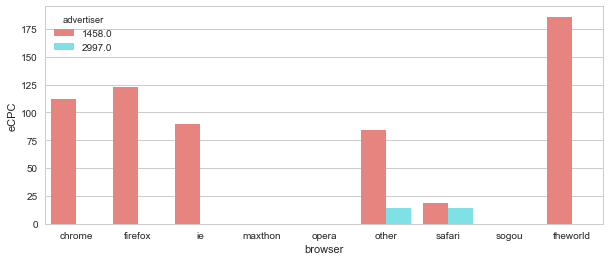

In [68]:
#eCPC-browser
click_1458=df_1458['click'].groupby(df_1458['browser']).sum()
click_2997=df_2997['click'].groupby(df_2997['browser']).sum()
pay_1458=df_1458['payprice'].groupby(df_1458['browser']).sum()/1000
pay_2997=df_2997['payprice'].groupby(df_2997['browser']).sum()/1000

eCPC_1458=pay_1458/click_1458
eCPC_2997=pay_2997/click_2997

eCPC, browser,advertiser = makefigure(eCPC_1458,eCPC_2997)
table_21=pd.DataFrame({"advertiser":advertiser,"browser":browser,"eCPC":eCPC})
plt.figure(figsize=(10, 4))
sns.barplot(x="browser", y="eCPC", hue="advertiser", data=table_21,palette=sns.hls_palette(2, l=.7, s=.9));

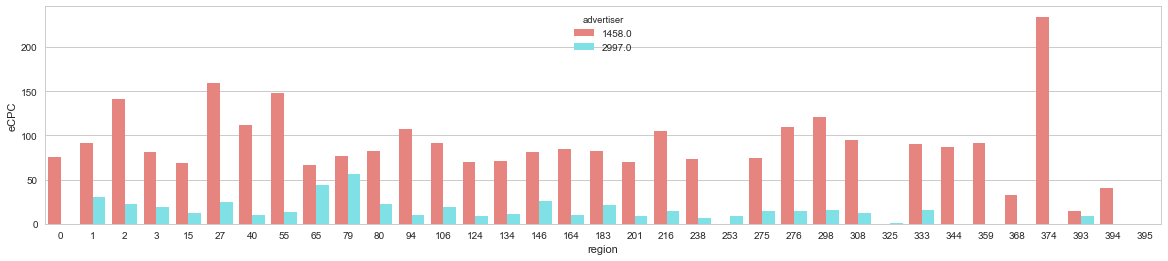

In [69]:
#eCPC-region
click_1458=df_1458['click'].groupby(df_1458['region']).sum()
click_2997=df_2997['click'].groupby(df_2997['region']).sum()
pay_1458=df_1458['payprice'].groupby(df_1458['region']).sum()/1000
pay_2997=df_2997['payprice'].groupby(df_2997['region']).sum()/1000

eCPC_1458=pay_1458/click_1458
eCPC_2997=pay_2997/click_2997

eCPC, region,advertiser = makefigure(eCPC_1458,eCPC_2997)
eCPC=eCPC
table_8=pd.DataFrame({"advertiser":advertiser,"region":region,"eCPC":eCPC})
plt.figure(figsize=(20, 4))
sns.barplot(x="region", y="eCPC", hue="advertiser", data=table_8,palette=sns.hls_palette(2, l=.7, s=.9));

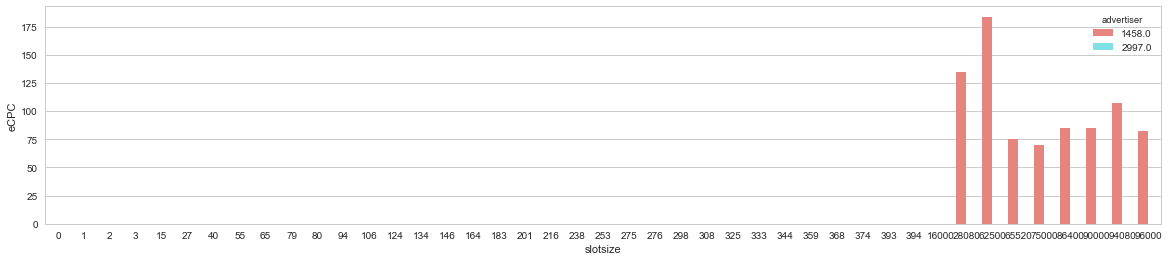

In [71]:
#eCPC-slotsize
click_1458=df_1458['click'].groupby(df_1458['slotsize']).sum()
click_2997=df_2997['click'].groupby(df_2997['slotsize']).sum()
pay_1458=df_1458['payprice'].groupby(df_1458['slotsize']).sum()/1000
pay_3358=df_2997['payprice'].groupby(df_2997['slotsize']).sum()/1000

eCPC_1458=pay_1458/click_1458
eCPC_2997=pay_2997/click_2997

eCPC,slotsize,advertiser = makefigure(eCPC_1458,eCPC_2997)
table_9=pd.DataFrame({"advertiser":advertiser,"slotsize":slotsize,"eCPC":eCPC})
plt.figure(figsize=(20, 4))
sns.barplot(x="slotsize", y="eCPC", hue="advertiser", data=table_9,palette=sns.hls_palette(2, l=.7, s=.9));

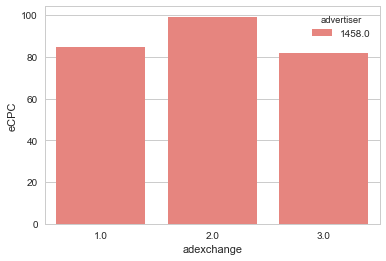

In [72]:
#eCPC-adexchange
click_1458=df_1458['click'].groupby(df_1458['adexchange']).sum()
click_2997=df_2997['click'].groupby(df_2997['adexchange']).sum()
pay_1458=df_1458['payprice'].groupby(df_1458['adexchange']).sum()/1000
pay_2997=df_2997['payprice'].groupby(df_2997['adexchange']).sum()/1000

eCPC_1458=pay_1458/click_1458
eCPC_2997=pay_2997/click_2997

eCPC,adexchange,advertiser = makefigure(eCPC_1458,eCPC_2997)
table_10=pd.DataFrame({"advertiser":advertiser,"adexchange":adexchange,"eCPC":eCPC})

sns.barplot(x="adexchange", y="eCPC", hue="advertiser", data=table_10,palette=sns.hls_palette(2, l=.7, s=.9));